In [120]:
import pickle
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
pathd = "/Users/davidmoore/Downloads/e2eSensorNetwork-master/motion/"

with open(pathd+"anal", "rb") as f:
    dump = pickle.load(f)
    
    
df = pd.DataFrame.from_records(dump)    

In [121]:
df['DurMins'].unique(),  df['Camera'].unique()

(array([  1,   2,   3,   4,   5, 386,   6]), array(['motion2'], dtype=object))

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Camera      442 non-null    object        
 1   StartEvent  442 non-null    datetime64[ns]
 2   EndEvent    442 non-null    datetime64[ns]
 3   FileName    442 non-null    object        
 4   DurMins     442 non-null    int64         
dtypes: datetime64[ns](2), int64(1), object(2)
memory usage: 17.4+ KB


In [123]:
#df['count'] = 1
#df['hr'] = df['StartEvent'].apply(lambda x: x.hour)
#df['day'] = df['StartEvent'].apply(lambda x: x.day)

In [124]:
df[df['DurMins'] == 386]

,Camera,StartEvent,EndEvent,FileName,DurMins
243,motion2,2020-12-08 23:19:34,2020-12-09 05:45:50,/home/pi/secSecure/Monitor2/01-20201208231934.mkv,386


In [125]:
df = df[(df['StartEvent'] > '2020-12-08 23:59:59')]

In [126]:
df['DurMins'].unique(), df.shape

(array([1, 4, 3, 2, 5, 6]), (198, 5))

In [127]:
idx = pd.date_range('2020-12-09 08:30:00', '2020-12-09 16:30:00', freq='S')
new_df = pd.DataFrame(idx)
new_df.columns = ['StartEvent']
new_df = pd.merge(new_df,df, on="StartEvent", how="left" )
print('Check merge ' + str(new_df['DurMins'].sum()) + ' '+ str(df['DurMins'].sum()))

Check merge 228.0 253


In [128]:
new_df['DurMins'].sum(), df['DurMins'].sum()

(228.0, 253)

In [129]:
new_df = new_df.set_index('StartEvent')
new_df['DurMins'] = new_df['DurMins'].fillna(0)

Text(0, 0.5, 'Total Events per 10 min interval')

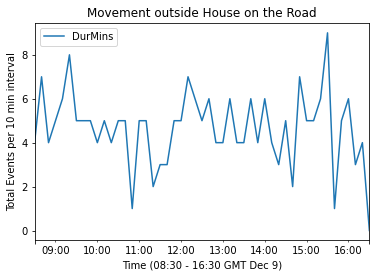

In [130]:
ax = new_df.resample('10T').sum().plot(title='Movement outside House on the Road')
ax.set_xlabel("Time (08:30 - 16:30 GMT Dec 9)")
ax.set_ylabel("Total Events per 10 min interval")